'Normal' images (sample): ['oral_normal_0001.jpg', 'oral_normal_0002.jpg', 'oral_normal_0003.jpg', 'oral_normal_0004.jpg', 'oral_normal_0005.jpg']
'Tumor' images  (sample): ['oral_scc_0001.jpg', 'oral_scc_0002.jpg', 'oral_scc_0003.jpg', 'oral_scc_0004.jpg', 'oral_scc_0005.jpg']
Total samples loaded: 10002 (Normal: 5001, Tumor: 5001)

--- Class Distributions ---
 Train class distribution: {np.int64(0): np.int64(3495), np.int64(1): np.int64(3505)}
 Val   class distribution: {np.int64(0): np.int64(753), np.int64(1): np.int64(748)}
 Test  class distribution: {np.int64(0): np.int64(753), np.int64(1): np.int64(748)}

--- Class Distributions ---
 Train class distribution: {np.int64(0): np.int64(3495), np.int64(1): np.int64(3505)}
 Val   class distribution: {np.int64(0): np.int64(753), np.int64(1): np.int64(748)}
 Test  class distribution: {np.int64(0): np.int64(753), np.int64(1): np.int64(748)}


C:\Users\ahmad\miniconda3\envs\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 153s 667ms/step - accuracy: 0.5582 - auc: 0.5727 - loss: 4.7384 - val_accuracy: 0.5017 - val_auc: 0.5000 - val_loss: 11.7453
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 143s 652ms/step - accuracy: 0.5785 - auc: 0.6166 - loss: 0.6647 - val_accuracy: 0.6243 - val_auc: 0.6823 - val_loss: 0.6669
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 143s 651ms/step - accuracy: 0.6148 - auc: 0.6666 - loss: 0.6600 - val_accuracy: 0.6076 - val_auc: 0.7636 - val_loss: 0.7939
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 143s 654ms/step - accuracy: 0.6296 - auc: 0.6721 - loss: 0.6441 - val_accuracy: 0.6802 - val_auc: 0.7674 - val_loss: 0.5988
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 142s 650ms/step - accuracy: 0.6507 - auc: 0.7150 - loss: 0.6059 - val_accuracy: 0.6582 - val_auc: 0.7551 - val_loss: 0.7169
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 150s 685ms/step - accuracy: 0.6762 - auc: 0.7385 - loss: 0.5968 - val_accuracy: 0.6922 - val_auc: 0.7757 - val_loss: 0.6361
Epoch 7/30
219/

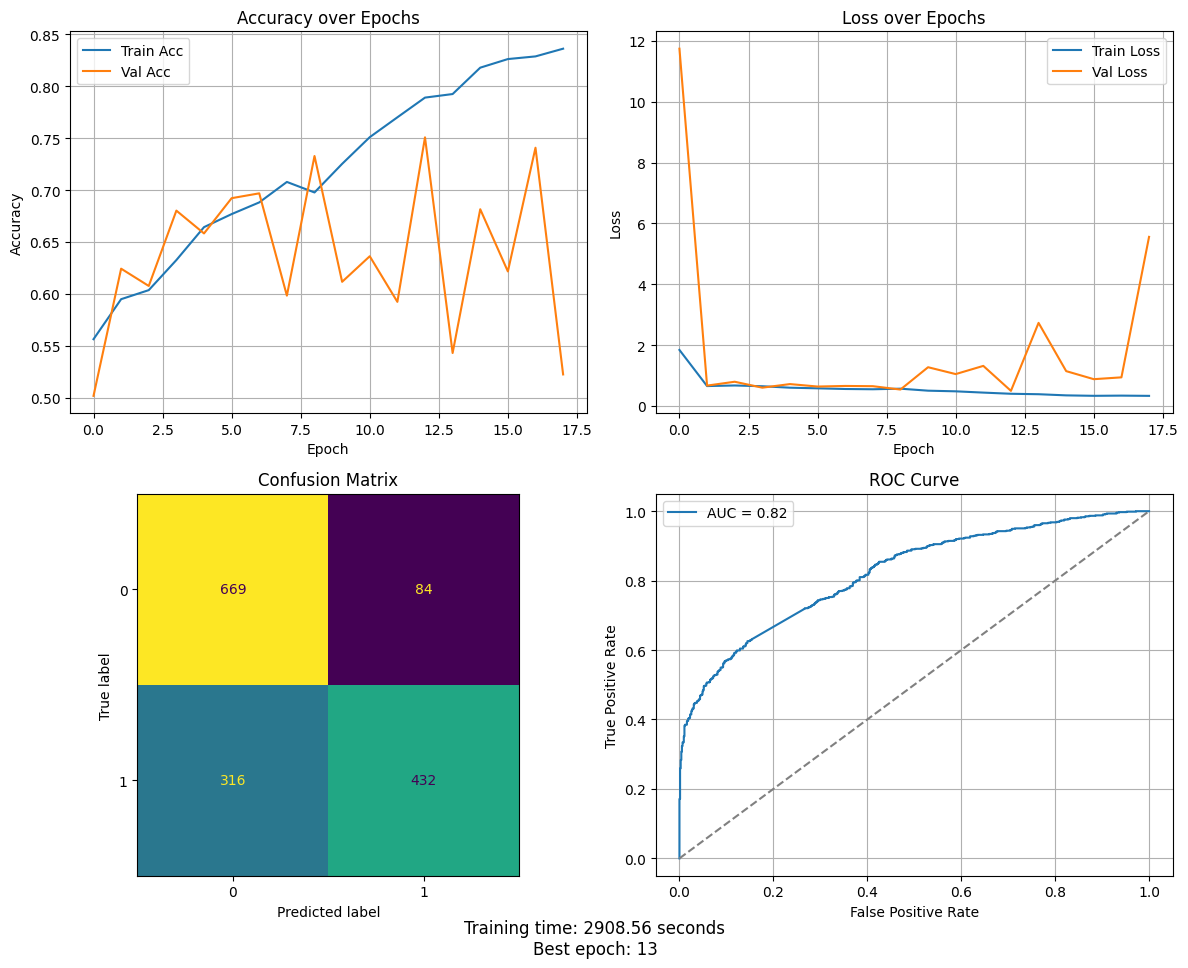

Metrics: ['loss', 'compile_metrics']
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.8361 - auc: 0.4250 - loss: 0.4250
Test Loss: 0.5138, Test Acc: 0.7335, Test AUC: 0.8201
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step

Classification Report (Test Set):
              precision    recall  f1-score   support

      Normal       0.68      0.89      0.77       753
       Tumor       0.84      0.58      0.68       748

    accuracy                           0.73      1501
   macro avg       0.76      0.73      0.73      1501
weighted avg       0.76      0.73      0.73      1501



<Figure size 640x480 with 0 Axes>

In [11]:
import os
import numpy as np
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import (
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# =============================================================================
# 1) Your original loader function (unchanged)
# =============================================================================
def load_images_from_folder(folder, label, max_images=None, image_size=224):
    imgs, labels, names = [], [], []
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")
    
    for f in os.listdir(folder)[:max_images]:
        if not f.lower().endswith(valid_extensions):
            continue
        img_path = os.path.join(folder, f)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue
        img = cv2.resize(img, (image_size, image_size))
        img = np.expand_dims(img, axis=-1) / 255.0  # (H,W,1) normalized
        imgs.append(img)
        labels.append(label)
        names.append(f)
    return imgs, labels, names

# =============================================================================
# 2) Paths & initial loading (unchanged)
# =============================================================================
NORMAL_PATH =r"C:\Users\ahmad\.cache\kagglehub\datasets\obulisainaren\multi-cancer\versions\3\Multi Cancer\Multi Cancer\Oral Cancer\oral_normal"
TUMOR_PATH  = r"C:\Users\ahmad\.cache\kagglehub\datasets\obulisainaren\multi-cancer\versions\3\Multi Cancer\Multi Cancer\Oral Cancer\oral_scc"

print("'Normal' images (sample):", os.listdir(NORMAL_PATH)[:5])
print("'Tumor' images  (sample):", os.listdir(TUMOR_PATH)[:5])

image_size = 224
max_images = 10000

normal_imgs, normal_lbls, normal_names = load_images_from_folder(NORMAL_PATH, 0, max_images, image_size)
tumor_imgs,  tumor_lbls,  tumor_names  = load_images_from_folder(TUMOR_PATH,  1, max_images, image_size)

X   = np.array(normal_imgs + tumor_imgs)
y   = np.array(normal_lbls + tumor_lbls)
ids = np.array(normal_names + tumor_names)

print(f"Total samples loaded: {len(X)} (Normal: {len(normal_imgs)}, Tumor: {len(tumor_imgs)})")

# =============================================================================
# 3) GROUP‐AWARE SPLIT into Train / Val / Test (70:15:15) – THIS PART WAS CORRECT
# =============================================================================

# X_temp, X_test, y_temp, y_test, ids_temp, ids_test = train_test_split(
#     X, y, ids,
#     test_size=0.15,
#     stratify=y,
#     random_state=42
# )

# # 2) Then split the remaining ~85% into train (70%) and val (15%):
# #    Note val_size = 0.15 / 0.85 ≈ 0.1765 of the temp set
# X_train, X_val, y_train, y_val, ids_train, ids_val = train_test_split(
#     X_temp, y_temp, ids_temp,
#     test_size=0.1765,
#     stratify=y_temp,
#     random_state=42)

from sklearn.model_selection import GroupShuffleSplit

# =============================================================================
# 3) GROUP‐AWARE SPLIT into Train / Val / Test (70:15:15) via GroupShuffleSplit
# =============================================================================

# — First split off 15% for TEST
gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
train_val_idx, test_idx = next(gss.split(X, y, groups=ids))

X_temp, X_test = X[train_val_idx], X[test_idx]
y_temp, y_test = y[train_val_idx], y[test_idx]
ids_temp, ids_test = ids[train_val_idx], ids[test_idx]

# — Then split the remaining ~85% into TRAIN (70%) and VAL (15%):
#   val_size relative to temp = 0.15/0.85 ≈ 0.1765
gss_val = GroupShuffleSplit(n_splits=1, test_size=0.1765, random_state=42)
train_idx, val_idx = next(gss_val.split(X_temp, y_temp, groups=ids_temp))

X_train, X_val = X_temp[train_idx], X_temp[val_idx]
y_train, y_val = y_temp[train_idx], y_temp[val_idx]
ids_train, ids_val = ids_temp[train_idx], ids_temp[val_idx]

# =============================================================================
# 4) ADDITIONAL CHECKS – ensure no leakage & balanced classes (unchanged)
# =============================================================================
def print_class_balance(name, y_array):
    unique, counts = np.unique(y_array, return_counts=True)
    dist = dict(zip(unique, counts))
    print(f" {name} class distribution: {dist}")

print("\n--- Class Distributions ---")
print_class_balance("Train", y_train)
print_class_balance("Val  ", y_val)
print_class_balance("Test ", y_test)

# =============================================================================
# 4) ADDITIONAL CHECKS (NEW BLOCK) – ensure no leakage & balanced classes
# =============================================================================


# 4b) Print class distribution in each split
def print_class_balance(name, y_array):
    unique, counts = np.unique(y_array, return_counts=True)
    dist = dict(zip(unique, counts))
    print(f" {name} class distribution: {dist}")

print("\n--- Class Distributions ---")
print_class_balance("Train", y_train)
print_class_balance("Val  ", y_val)
print_class_balance("Test ", y_test)

# =============================================================================
# 5) Your original plotting function (unchanged)
# =============================================================================
def plot_training_summary(history, model, X_val, y_val, fig_name, training_time=None, best_epoch=None, save_fig=False):
    # Predict probabilities and labels
    y_probs = model.predict(X_val).ravel()
    y_pred  = (y_probs > 0.5).astype(int)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_probs)
    roc_auc = auc(fpr, tpr)

    # Create 2×2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # --- Accuracy Plot ---
    axs[0, 0].plot(history.history['accuracy'], label='Train Acc')
    axs[0, 0].plot(history.history['val_accuracy'], label='Val Acc')
    axs[0, 0].set_title('Accuracy over Epochs')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # --- Loss Plot ---
    axs[0, 1].plot(history.history['loss'], label='Train Loss')
    axs[0, 1].plot(history.history['val_loss'], label='Val Loss')
    axs[0, 1].set_title('Loss over Epochs')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axs[1, 0], colorbar=False)
    axs[1, 0].set_title('Confusion Matrix')

    # --- ROC Curve ---
    axs[1, 1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    axs[1, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axs[1, 1].set_title('ROC Curve')
    axs[1, 1].set_xlabel('False Positive Rate')
    axs[1, 1].set_ylabel('True Positive Rate')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    # Add training time and best epoch as text
    if training_time is not None and best_epoch is not None:
        summary_text = f"Training time: {training_time:.2f} seconds\nBest epoch: {best_epoch}"
        fig.text(0.5, 0.01, summary_text, ha='center', fontsize=12)

        print("Training Summary:")
        print(summary_text)

    if save_fig:
        plt.savefig('script_results/Model_summary_' + fig_name + '.png')

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# =============================================================================
# 6) Your data‐augmentation & tf.data pipeline (unchanged)
# =============================================================================
# data_aug = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.05),            # ± 5 %
#     tf.keras.layers.RandomBrightness(0.10),
# ])

train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
      .shuffle(len(X_train), seed=42)
      .batch(32)
      .prefetch(tf.data.AUTOTUNE)
)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

# =============================================================================
# 7) Your CNN builder (unchanged)
# =============================================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_cnn(input_shape=(224, 224, 1), dropout=0.5, lr=1e-3):
    model = Sequential([
        Conv2D(32, 3, activation="relu", input_shape=input_shape),
        BatchNormalization(), 
        MaxPooling2D(),
        
        Conv2D(64, 3, activation="relu"), 
        BatchNormalization(), 
        MaxPooling2D(),
        
        Conv2D(128, 3, activation="relu"), 
        BatchNormalization(), 
        MaxPooling2D(),
        
        Flatten(),
        Dense(128, activation="relu"), 
        Dropout(dropout),
        Dense(1, activation="sigmoid")
    ])
    
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss="binary_crossentropy",
                  metrics=["accuracy",AUC(name="auc")]    )
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    start_time = time.time()

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=30,
        callbacks=[early_stopping]
    )

    end_time = time.time()
    training_time = end_time - start_time
    best_epoch = np.argmin(history.history['val_loss']) + 1 

    return model, history, training_time, best_epoch

# =============================================================================
# 8) <— HERE IS THE FIX: Remove the second train_test_split entirely! 
#     We already did GroupShuffleSplit above. Do NOT overwrite X_train, etc.
# =============================================================================
# (This entire block is removed. DO NOT do any train_test_split on (X,y) again.)

# =============================================================================
# 9) Call build_cnn correctly (fixed function name & arguments)
# =============================================================================
dropout_rate = 0.5
learning_rate = 0.001

# The original code incorrectly said “initial_cnn(...)” and passed X_train, etc.
# Instead, just call build_cnn with input_shape, dropout, and lr (train_ds/val_ds are used internally).
initial_model, initial_history, initial_model_time, initial_model_epochs = build_cnn(
    input_shape=X_train[0].shape, 
    dropout=dropout_rate, 
    lr=learning_rate
)

# =============================================================================
# 10) Plot & save the training summary (unchanged, except fig_name)
# =============================================================================
os.makedirs("script_results", exist_ok=True)
model_name = 'initial_cnn_kidney'  # You can keep or change this

plot_training_summary(
    initial_history,
    initial_model,
    X_test,
    y_test,
    fig_name=model_name,
    training_time=initial_model_time,
    best_epoch=initial_model_epochs,
    save_fig=True
)

plt.savefig("script_results/Model_summary_initial_cnn_kidney.png")

initial_model.save('script_results/' + model_name + '.keras')

# =============================================================================
# 11) OPTIONAL: Evaluate on the test set and print a classification report
#     (We’ll do raw NumPy predictions, as in the plotting function.)
# =============================================================================
# Load the saved model (just to be sure we’re using the best weights)
best_model = tf.keras.models.load_model('script_results/' + model_name + '.keras')
print("Metrics:", best_model.metrics_names)


test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
# 11a) Evaluate on test_ds for loss/accuracy
test_loss, test_acc, test_auc = best_model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Test AUC: {test_auc:.4f}")

# 11b) Classification report (requires raw NumPy arrays)
y_probs_test = best_model.predict(X_test).ravel()
y_pred_test  = (y_probs_test > 0.5).astype(int)

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=["Normal", "Tumor"]))
